Import relevant libraries

In [1]:
import pandas as pd
from Preprocessing.preprocessing import preprocessing
import time
import torch
from tsai.all import *
import os
from Optimizer.optimizer import optimize_model, optimize_data_classification, optimize_data_regression
from Evaluation.evaluation_tsai import calculate_pseudo_return, get_plots_classification, get_plots_regression
from fastai.callback.tracker import EarlyStoppingCallback

print('GPU support:', torch.cuda.is_available())
computer_setup()

c:\Users\karll\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU support: False
os              : Windows-10-10.0.22621-SP0
python          : 3.9.13
tsai            : 0.3.5
fastai          : 2.7.11
fastcore        : 1.5.28
torch           : 1.13.1+cpu
cpu cores       : 6
threads per cpu : 2
RAM             : 15.9 GB
GPU memory      : [6.0] GB


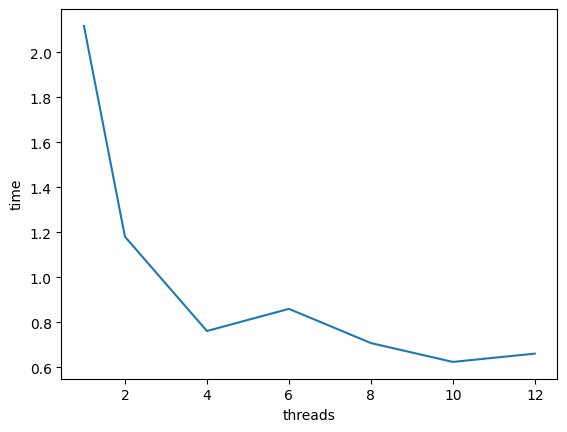

In [2]:
import timeit
runtimes = []
threads = [1] + [t for t in range(2, 13, 2)]
for t in threads:
    torch.set_num_threads(t)
    r = timeit.timeit(setup = "import torch; x = torch.randn(1024, 1024); y = torch.randn(1024, 1024)", stmt="torch.mm(x, y)", number=100)
    runtimes.append(r)
# ... plotting (threads, runtimes) ...

plt.plot(threads,runtimes)
plt.ylabel("time")
plt.xlabel("threads")
plt.show()

In [3]:
print(torch.get_num_threads())
torch.set_num_threads(10)
print(torch.get_num_threads())

12
10


Finds the best features

In [ ]:
from Optimizer.optimizer import optimize_data_classification, optimize_data_regression

df = pd.read_csv('Data\\twelve_data\\AAPL_15min')#[-50000:].reset_index(drop=True)
dataset = "twelve"
timestep = '15min'
epochs = 20
trials = 25
model_type = "mini_rocket"
test_size = 26

optimize_data_classification(df=df, dataset=dataset, timestep=timestep, epochs=epochs, trials=trials, model_type=model_type, seq_length=30, test_size=test_size)
#optimize_data_regression(df=df, dataset=dataset, timestep=timestep, epochs=epochs, trials=trials, model_type=model_type, seq_length=30)

In [26]:
df = pd.read_csv("Optimizer/data_optimization/classifier_hyperparameters_results.csv").fillna('None')

#labels = 100*['1min']+100*['5min']+100*['15min']
#df['timestep'] = labels

bucket_results = df.groupby('buckets').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
TI_results = df.groupby('TI').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
index_results = df.groupby('index').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
diff_results = df.groupby('dif_all').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
model_results = df.groupby('model').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
model_results = df.groupby('model').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
data_results = df.groupby('timestep').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)

print(bucket_results)
print(TI_results)
print(index_results)
print(diff_results)
print(model_results)
print(data_results)


        bin_accuracy      
                mean count
buckets                   
5           0.546795     4
4           0.544615     5
10          0.526740     7
3           0.526496     3
11          0.513846    10
15          0.512179     4
8           0.506667     5
12          0.502137     6
1           0.498535     7
6           0.496795     4
7           0.486538     4
13          0.465568     7
2           0.457265     3
9           0.403419     3
14          0.380342     3
      bin_accuracy      
              mean count
TI                      
True      0.508100    44
False     0.482548    31
      bin_accuracy      
              mean count
index                   
1min      0.505641    15
15min     0.504049    19
None      0.502720    33
5min      0.445513     8
        bin_accuracy      
                mean count
dif_all                   
False       0.511603    40
True        0.481465    35
            bin_accuracy      
                    mean count
model            

In [6]:
df1 = pd.read_csv("Optimizer/data_optimization/classifier_hyperparameters_results_LSCS.csv").fillna('None')
df2 = pd.read_csv("Optimizer/data_optimization/classifier_hyperparameters_result_olds.csv").fillna('None')

df = pd.concat([df1, df2], ignore_index=True)

bucket_results = df.groupby('buckets').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
TI_results = df.groupby('TI').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
index_results = df.groupby('index').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)
diff_results = df.groupby('dif_all').agg({'bin_accuracy': ['mean', 'count']}).sort_values(by=('bin_accuracy',  'mean'),ascending=False)

print(bucket_results)
print(TI_results)
print(index_results)
print(diff_results)

        bin_accuracy      
                mean count
buckets                   
1           0.506289    30
2           0.506140    19
15          0.503816    18
11          0.502880    18
10          0.502386    22
7           0.501572    28
4           0.501527    26
5           0.501283    22
3           0.501229    21
12          0.500272    24
8           0.499396    23
13          0.499380    19
9           0.497845    27
14          0.497359    12
6           0.493745    23
      bin_accuracy      
              mean count
TI                      
False     0.502982   183
True      0.498775   149
      bin_accuracy      
              mean count
index                   
5min      0.507883    40
1min      0.506863    44
15min     0.504742    42
1h        0.500405    44
None      0.498231   145
30min     0.492779    13
1day      0.469854     4
        bin_accuracy      
                mean count
dif_all                   
True        0.501543   157
False       0.500691   175


Optimize the chosen model

In [4]:
from Optimizer.optimizer import optimize_model

file = 'Data\twelve_data\AAPL_15min'

df = pd.readcsv(file)
index = file.split('\\')[-1].split('_')[-1]
data = 'twelve' if 'twelve' in file else 'alpacca'

preprocessing_params = {
    'df': df,
    'lag': 1,
    'dif_all': False,
    'train_size': 0.95,
    'TSAI': True,
    'CLF': False,
    'index': index,
    'data': data,
    'buckets': 2,
    'TI' : True
}

model_type = 'tst'

Classifier = preprocessing_params['CLF']
model_type = model_type + '_class' if Classifier else model_type + '_reg'

opti = True
if opti:
    optimize_model(model_type=model_type, preprocessing_params=preprocessing_params, n_trials=10, n_epochs=2, CLF = Classifier)

results_df = pd.read_csv(f"models/{model_type}/{model_type}_hyperparameters_results.csv")

if Classifier: 
    df = results_df.sort_values(by='val_accuracy', ascending=False)
else: 
    df = results_df.sort_values(by='val_mae', ascending=True)

df

,model,seq_length,d_model,n_layers,n_heads,d_ff,dropout,learning_rate,val_accuracy,time
0,tst_class,150,64,4,8,512,0.3,0.008840,0.485714,0.007979
1,tst_class,300,512,2,8,128,0.0,0.000022,0.485714,0.025931
2,tst_class,100,64,1,32,256,0.3,0.001682,0.474286,0.002990
3,tst_class,50,256,2,32,128,0.3,0.005856,0.462857,0.008975
4,tst_class,150,512,2,32,1024,0.0,0.009368,0.488235,0.058642


In [9]:
model_type = 'lstm_class'

with open(f"models/{model_type}/{model_type}_best_params.json", "r") as f:
    best_params = json.load(f)

best_params

{'seq_length': 200,
 'batch_size': 16,
 'hidden_size': 25,
 'n_layers': 1,
 'rnn_dropout': 0.5,
 'fc_dropout': 0.4,
 'learning_rate': 0.0019302736528178678}

Select a stock for Machine Learning Model Training and preprocesses it

In [10]:
# Preprocess the data using a custom function and split it into training and testing sets
# Only the training and testing sets are used, so the third variable (a scalar) is discarded using an underscore

seq_length = best_params.pop('seq_length', None)
data_train, datatest,  = preprocessing(**preprocessing_params, sequence_length=seq_length, print_info=True)

# Changes the data into features and labels with the split used later in TSAI for modelling
test_points = 200
X, y, splits = combine_split_data([data_train[0], data_test[0][:test_points]],[data_train[1], data_test[1][:test_points]])

# Utilizes the GPU if possible
if torch.cuda.is_available(): X, y = X.cuda(), y.cuda()

batch_size = best_params.pop('batch_size', None)
if Classifier:
    dsets = TSDatasets(X, y, splits=splits)
    dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=batch_size)
    print(len(dsets.train),len(dsets.valid))
else: 
    dls = get_ts_dls(X, y, splits=splits, bs=batch_size)

# Note this tabel is before sequenceing so the actuall values is total - sequence then times train_size

   Label  Count  Train count  Test count  Bucket min  Bucket max
0    0.0  12126        11025        1100    -3.21000    -0.04000
1    1.0  12288        10966        1322    -0.04000    -0.00009
2    2.0  12862        11494        1368     0.00000     0.03999
3    3.0  12722        11513        1209     0.03999     3.11999
4  Total  49998        44998        4999    -3.21000     3.11999


Initializes the models and learners

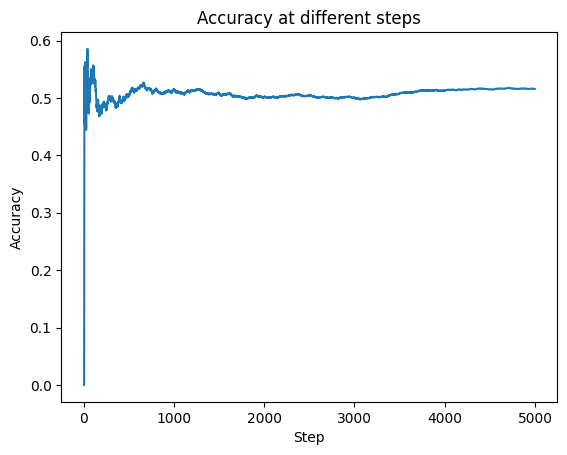

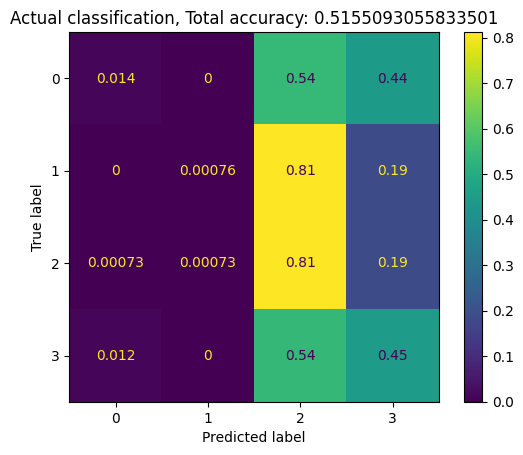

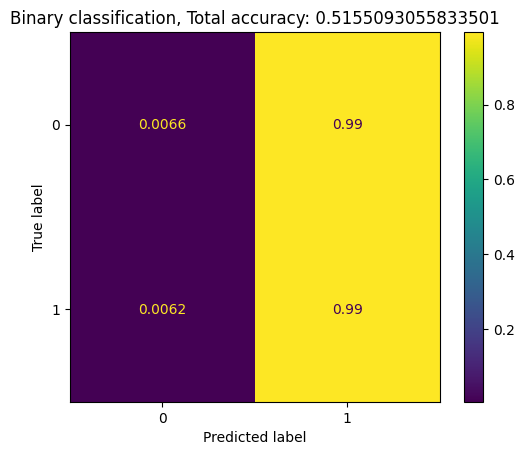

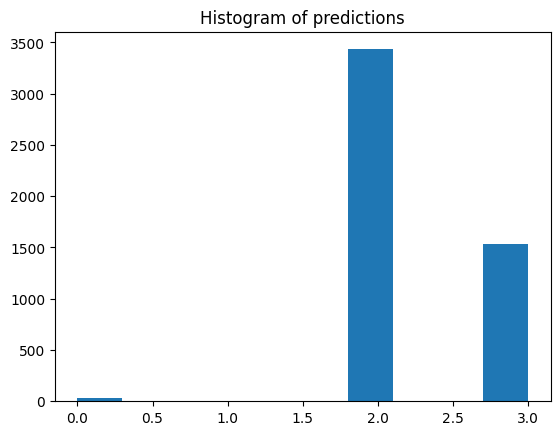

In [11]:
nr_features = X.shape[1] # Number of features
nr_labels = torch.unique(y).numel() if Classifier else 1 # Number of labels

model_params = {key: value for key, value in best_params.items() if key not in ('seq_length', 'batch_size', 'learning_rate')}

# Initiates the models
if model_type == 'lstm_class' or model_type == 'lstm_reg': model = LSTMPlus(c_in=nr_features, c_out=nr_labels, **model_params, shuffle=False)
if model_type == 'lstm_fcn_class' or model_type == 'lstm_fcn_reg': model = LSTM_FCNPlus(c_in=nr_features, c_out=nr_labels, **model_params, shuffle=False)
if model_type == 'tst_class' or model_type == 'tst_reg': model = TST(c_in=nr_features, c_out=nr_labels, seq_len=seq_length, **model_params)
#if model_type == 'mini_rocket': model = 

# Initiates a learner
if Classifier:
    learner = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[accuracy], cbs=[EarlyStoppingCallback(patience=20), ShowGraphCallback2()])
else:
    learner = ts_learner(dls, model, metrics=[mae, rmse], cbs=[EarlyStoppingCallback(patience=20), ShowGraphCallback2()])

# Trains the model
epochs = 100
learner.fit_one_cycle(n_epoch = epochs)

if torch.cuda.isavailable(): X, y = X.cpu(), y.cpu()

# Save the model
learner.save("trained" + model_type)

#calculate_pseudo_return(lag = preprocessing_params.pop('lag', None), sequence_length = seq_length, splits = splits, df = df, predictions, transaction_cost = 0) 
if Classifier:
    get_plots_classification(learner = learner, X = X, y = y, splits = splits, buckets = preprocessing_params["buckets"])
else:
    get_plots_regression(learner = learner, X = X, y = y, splits = splits)

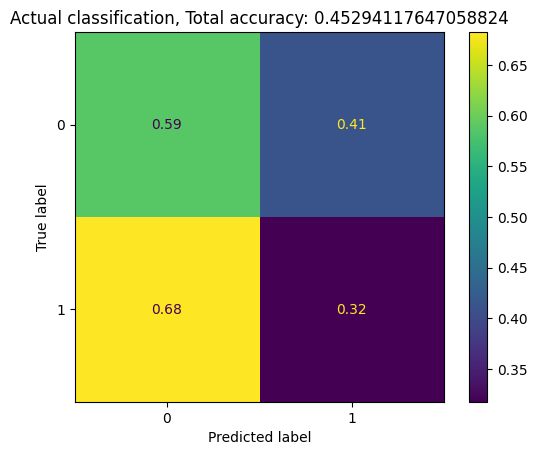

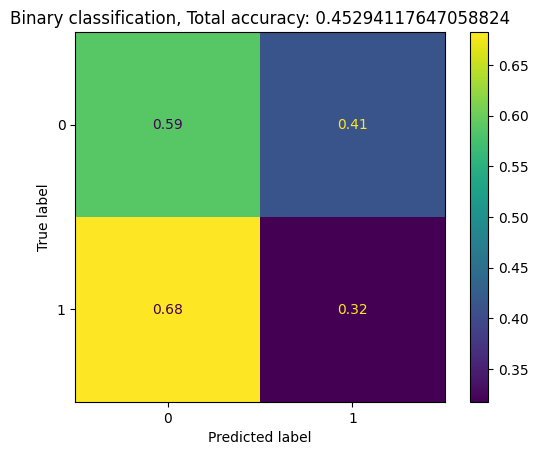

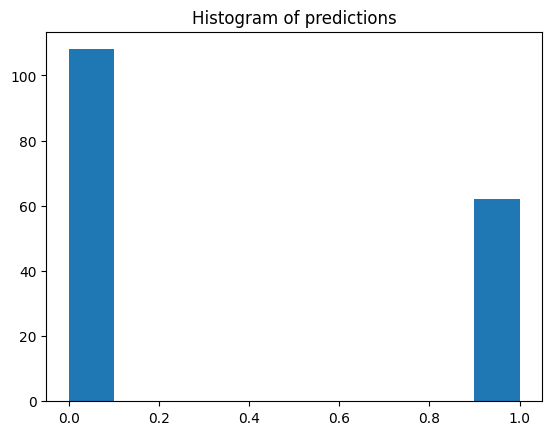

In [ ]:
#Add plots automatically
from Evaluation.evaluation_tsai import calculate_pseudo_return, get_plots_classification

get_plots_classification(learner['TST'], X, y, splits, 1)
calculate_pseudo_return